In [2]:
# 1. 기본 라이브러리 불러오기
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

In [3]:
# 2. 사용자 정의 함수 ImageConv(inp, mask) 정의하기
def ImageConv(inp, mask):
    n = mask.shape[0]
    k = np.uint8((n-1)/2)
    h,w = inp.shape
    inp_pad = np.zeros((h+2*k, w+2*k))
    inp_pad[k:h+k, k:w+k] = inp
    out = np.zeros((h+2*k, w+2*k))
    for i in range(k, h+k):
        for j in range(k, w+k):
            temp = inp_pad[i-k:i+k+1, j-k:j+k+1]
            for x in range(0,n):
                for y in range(0,n):
                    out[i,j] += temp[x,y]*mask[x,y]
    out = out[k:h+k, k:w+k]
    return np.uint8(out)

In [4]:
# 3. 언샤프 마스킹과 고주파 지원 필터를 설계하기

mask = np.array([[1,1,1], [1,1,1], [1,1,1]])/9
print(mask)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [5]:
# 4. 'chip.jpg'를 흑백영상(inp)으로 불러와서 적용(out1, out2)
inp = cv2.imread('images/chip.jpg', cv2.IMREAD_GRAYSCALE)
blur_inp = ImageConv(inp, mask)
alpha = 2
out1 = inp - blur_inp # Unsharp Masking
out2 = (alpha*inp) - blur_inp # High Boost

out1[out1<0] = 0
out1[out1>255] = 255
out2[out2<0] = 0
out2[out2>255] = 255
# plt.imshow(inp,cmap='gray')

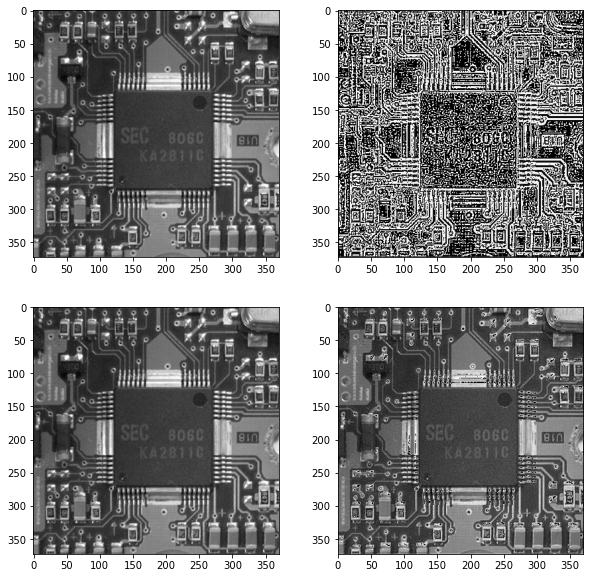

In [10]:
plt.figure(figsize=(10,10)) # 크기 조정
plt.subplot(2,2,1); plt.imshow(inp,cmap='gray')
plt.subplot(2,2,2); plt.imshow(out1,cmap='gray')
plt.subplot(2,2,3); plt.imshow(inp,cmap='gray')
plt.subplot(2,2,4); plt.imshow(out2,cmap='gray')